## No.1

**Pilih notebook yang menggunakan metode DBSCAN/Agglomerative Clustering lalu lakukan analisa dan improvisasi.**

### Source Notebook
https://www.kaggle.com/ashydv/country-clustering-hierarchical-clustering-pca

### Analysis
* Dataset ini berisikan data-data negara berikut dengan indeks sosial ekonomi.
* Tujuan nya adalah dapat mengkelompokkan negara mana saja yang menjadi prioritas dalam aktivitas bantuan sosial.
* Kategori berdasarkan : kematian anak, ekspor, impor, kesehatan, pendapatan, inflasi, GDP.
* Data preprocessing sudah dilakukan dengan sangat baik.
* Visualisasi sangat intuitif.
* Pembuatan model clustering sudah dilakukan dengan sangat baik sesuai metode" yang dianjurkan.

### Improvement

* Dapat menggunakan hyperparameter (tuning).
* Dapat menggunakan metode lain untuk pengukuran jarak.
* Dapat menggunakan variabel lain untuk menghilangkan multikorelasi.

### Reason
* Creator memilih pendekatan hierarkis karena mudah diimplementasikan, dipahami secara visualisasi, dan dapat menampung banayak tipe data yang berbeda.

## No.2 
**Pilih dataset dan tentukan model algortima yang cocok.**

Saya memilih dataset Mall Customers dari kaggle untuk melakukan model segmentasi / clustering.

### Preparing data

In [67]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade kneed
from kneed import KneeLocator, DataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [89]:
SourceFile = 'https://raw.githubusercontent.com/fufundany30/DigitalSkola-Capstone-Project/main/Mall_Customers.csv'
df = pd.read_csv(SourceFile)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [90]:
df["Gender"].replace({"Female": 1, "Male": 0}, inplace=True)
df.drop(columns='CustomerID',axis=1,inplace=True)
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Find the best K-value

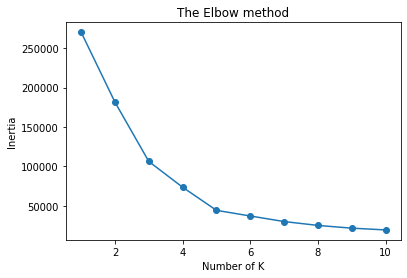

In [119]:
#membuat dataset baru dengan variabel Annual Income dengan Spending Score
X = df.iloc[:, [2, 3]].values
Y = df.iloc[:, [1, 3]].values

#elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker='o')
plt.title('The Elbow method')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show();

### Choose model

#### K-Means Algorithm

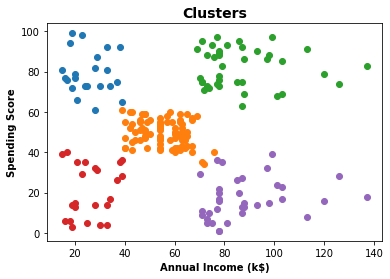

In [118]:
# membuat model clustering annual income vs spending score
model1 = KMeans(n_clusters = 5, init='k-means++', random_state=42)
# fit model dan prediksi cluster
yhat = model1.fit_predict(X)
# mendapatkan nilai unik cluster
clusters = np.unique(yhat)
# membuat scatter plot untuk setiap sample cluster
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.title('Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=10, fontweight='bold')
plt.ylabel('Spending Score', fontsize=10, fontweight='bold');
plt.show()

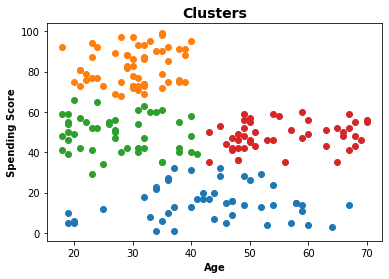

In [115]:
# membuat model clustering age vs spending score
model2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
# fit model dan prediksi cluster
yhat = model2.fit_predict(Y)
# mendapatkan nilai unik cluster
clusters = np.unique(yhat)
# membuat scatter plot untuk setiap sample cluster
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(Y[row_ix, 0], Y[row_ix, 1])
plt.title('Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=10, fontweight='bold')
plt.ylabel('Spending Score', fontsize=10, fontweight='bold');
plt.show()

#### DBSCAN Algorithm

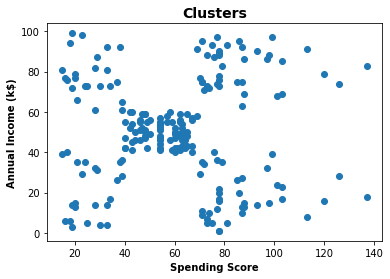

In [116]:
# membuat model clustering annual income vs spending score
model3 = DBSCAN(eps=0.30, min_samples=5)
# fit model dan prediksi cluster
yhat = model3.fit_predict(X)
# mendapatkan nilai unik cluster
clusters = np.unique(yhat)
# membuat scatter plot untuk setiap sample cluster
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.title('Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Spending Score', fontsize=10, fontweight='bold')
plt.ylabel('Annual Income (k$)', fontsize=10, fontweight='bold');
plt.show()

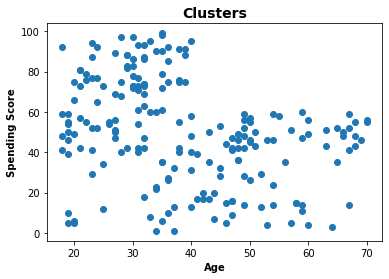

In [117]:
# membuat model clustering age vs spending score
model4 = DBSCAN(eps=0.30, min_samples=4)
# fit model dan prediksi cluster
yhat = model4.fit_predict(Y)
# mendapatkan nilai unik cluster
clusters = np.unique(yhat)
# membuat scatter plot untuk setiap sample cluster
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(Y[row_ix, 0], Y[row_ix, 1])
plt.title('Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=10, fontweight='bold')
plt.ylabel('Spending Score', fontsize=10, fontweight='bold');
plt.show()

Saya memilih K-Means Algorithm karena memliki hasil yang sangat bagus dibandingkan dengan DBSCAN